In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx
import utils

In [2]:
from collections import defaultdict
from tqdm import tqdm

This are the mapped yago categories

In [3]:
CATEGORIES = [
    "wordnet_association_108049401",
    "wordnet_authorization_101138670",
    "wordnet_ban_107255401",
    "wordnet_case_law_106535035",
    "wordnet_civil_liberty_113995662",
    "wordnet_code_of_conduct_105668095",
    "wordnet_common_law_108453722",
    "wordnet_company_108058098",
    "wordnet_contract_106520944",
    "wordnet_cooperative_101100877",
    "wordnet_corporation_108059412",
    "wordnet_court_108329453",
    "wordnet_criminal_record_106490173",
    "wordnet_decree_106539770",
    "wordnet_delegating_101140839",
    "wordnet_directive_107170080",
    "wordnet_exemption_100213903",
    "wordnet_foundation_108406486",
    "wordnet_indebtedness_114490319",
    "wordnet_interdiction_107255299",
    "wordnet_judge_110225219",
    "wordnet_judiciary_108166187",
    "wordnet_law_106532330",
    "wordnet_law_108441203",
    "wordnet_lawyer_110249950",
    "wordnet_legal_code_106667792",
    "wordnet_legal_document_106479665",
    "wordnet_legislation_106535222",
    "wordnet_legislative_act_106564387",
    "wordnet_legislature_108163273",
    "wordnet_liability_114530403",
    "wordnet_liberty_113994456",
    "wordnet_liberty_113996061",
    "wordnet_limited_company_108185211",
    "wordnet_mandate_106556481",
    "wordnet_obligation_106773150",
    "wordnet_party_110402824",
    "wordnet_permission_106689297",
    "wordnet_pleading_106559365",
    "wordnet_prerogative_105178715",
    "wordnet_privilege_105158296",
    "wordnet_privilege_105179567",
    "wordnet_proclamation_101266491",
    "wordnet_prohibition_106542047",
    "wordnet_right_104850341",
    "wordnet_right_105174653",
    "wordnet_right_113341756",
    "wordnet_treaty_106773434",
    "wordnet_written_agreement_106771653",
]

In [4]:
RESOURCE_PREFIX = 'http://yago-knowledge.org/resource/'

In [5]:
def get_subclasses_number(category_name, filter_wikicat=False):
    query = """SELECT DISTINCT (count(distinct ?subCategory) as ?count) WHERE {
        ?subCategory rdfs:subClassOf <%s%s> .
        ?entity rdf:type ?subCategory .""" % (RESOURCE_PREFIX, category_name)
    if filter_wikicat:
        query += 'FILTER (!regex(str(?subCategory), "wikicat"))}'
    else:
        query += '}'
    response = utils.query_sparql(query, utils.YAGO_ENPOINT_URL)
    return response[1][0]

Let's count the number of subcategories there is for each mapped class. The first results includes all categories with entities, the second only wordnet_* categories

In [6]:
for category in CATEGORIES:
    print category, get_subclasses_number(category), get_subclasses_number(category, True)

wordnet_association_108049401 208 9
wordnet_authorization_101138670 1 1
wordnet_ban_107255401 0 0
wordnet_case_law_106535035 0 0
wordnet_civil_liberty_113995662 1 0
wordnet_code_of_conduct_105668095 1 0
wordnet_common_law_108453722 0 0
wordnet_company_108058098 8411 21
wordnet_contract_106520944 2 1
wordnet_cooperative_101100877 62 0
wordnet_corporation_108059412 52 1
wordnet_court_108329453 166 6
wordnet_criminal_record_106490173 1 0
wordnet_decree_106539770 3 3
wordnet_delegating_101140839 0 0
wordnet_directive_107170080 4 0
wordnet_exemption_100213903 0 0
wordnet_foundation_108406486 1 1
wordnet_indebtedness_114490319 0 0
wordnet_interdiction_107255299 0 0
wordnet_judge_110225219 811 8
wordnet_judiciary_108166187 3 0
wordnet_law_106532330 3 3
wordnet_law_108441203 70 1
wordnet_lawyer_110249950 463 6
wordnet_legal_code_106667792 6 1
wordnet_legal_document_106479665 19 10
wordnet_legislation_106535222 0 0
wordnet_legislative_act_106564387 28 0
wordnet_legislature_108163273 44 2
wordne

In [6]:
# graph = networkx.DiGraph()
# for category in tqdm(CATEGORIES):
#     utils.add_subcategories(category, graph)

100%|██████████| 49/49 [03:30<00:00,  4.01s/it]


In [7]:
graph = utils.pickle_from_file('../../data/yago_hierarchy.pickle')

In [7]:
# utils.pickle_to_file(graph, '../../data/yago_hierarchy.pickle')

In [9]:
networkx.to_dict_of_lists(graph)

{u'wordnet_accreditation_101140193': [],
 u'wordnet_accusation_107234230': [u'wordnet_allegation_107236077'],
 u'wordnet_act_106532095': [u'wordnet_legislative_act_106564387',
  u'wordnet_decree_106539770'],
 u'wordnet_advocate_109775663': [],
 u'wordnet_alcalde_109781804': [],
 u'wordnet_allegation_107236077': [],
 u'wordnet_appellate_court_108330106': [],
 'wordnet_association_108049401': [u'wordnet_league_108231184',
  u'wordnet_gang_108244062',
  u'wordnet_institute_108407330',
  u'wordnet_secret_society_108235343',
  u'wordnet_professional_association_108242675',
  u'wordnet_family_108227916',
  u'wordnet_consortium_108236438',
  u'wordnet_club_108227214',
  u'wordnet_chamber_of_commerce_108319061'],
 'wordnet_authorization_101138670': [u'wordnet_certification_101139830'],
 'wordnet_ban_107255401': [],
 u'wordnet_barrister_109840963': [u'wordnet_serjeant-at-law_110581890'],
 u'wordnet_baseball_league_108231874': [],
 u'wordnet_basketball_league_108232299': [],
 u'wordnet_bill_1065

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


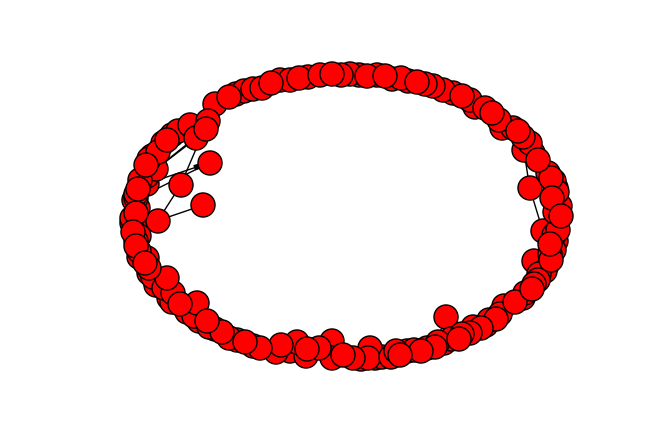

In [10]:
networkx.draw_spring(graph, with_labels=False)
plt.draw()

Let's add the new hierarchy to the old mapping

In [11]:
LKIF_TO_YAGO = {
    'Decree': [u'wordnet_prohibition_106542047', u'wordnet_decree_106539770'],
    'Proclamation': [u'wordnet_proclamation_101266491'],
    'Public_Body': [u'wordnet_court_108329453'],
    'Regulation': [
        u'wordnet_law_106532330', u'wordnet_legal_code_106667792', u'wordnet_legislation_106535222',
        u'wordnet_law_108441203'],
    'Immunity': [u'wordnet_exemption_100213903'],
    'Foundation': [u'wordnet_foundation_108406486'],
    'Permission': [u'wordnet_permission_106689297'],
    'Company': [u'wordnet_company_108058098'],
    'Prohibition': [u'wordnet_prohibition_106542047', u'wordnet_ban_107255401', u'wordnet_interdiction_107255299'],
    'Liability_Right': [u'wordnet_indebtedness_114490319'],
    'Legal_Doctrine': [u'wordnet_common_law_108453722', u'wordnet_case_law_106535035'],
    'Legal_Document': [
        u'wordnet_written_agreement_106771653', u'wordnet_criminal_record_106490173',
        u'wordnet_mandate_106556481', u'wordnet_legal_document_106479665'],
    'Corporation': [u'wordnet_corporation_108059412'],
    'Legislative_Body': [u'wordnet_legislature_108163273'],
    'Permissive_Right': [u'wordnet_authorization_101138670'],
    'Statute': [u'wordnet_legislative_act_106564387'],
    'Limited_Company': [u'wordnet_limited_company_108185211'],
    'Legal_Speech_Act': [u'wordnet_pleading_106559365'],
    'Contract': [u'wordnet_contract_106520944'],
    'Treaty': [u'wordnet_treaty_106773434'],
    'Legal_Role': [u'wordnet_party_110402824'],
    'Liberty_Right': [
        u'wordnet_privilege_105179567', u'wordnet_liberty_113996061', u'wordnet_prerogative_105178715',
        u'wordnet_civil_liberty_113995662', u'wordnet_privilege_105158296', u'wordnet_liberty_113994456'],
    'Obligation': [u'wordnet_obligation_106773150'],
    'Right': [u'wordnet_right_104850341', u'wordnet_right_105174653'],
    'Professional_Legal_Role': [
        u'wordnet_judge_110225219', u'wordnet_lawyer_110249950',
        u'wordnet_judiciary_108166187'],
    'Delegation': [u'wordnet_delegating_101140839'],
    'Society': [u'wordnet_association_108049401'],
    'Potestative_Right': [u'wordnet_right_113341756'],
    'Code_of_Conduct': [u'wordnet_code_of_conduct_105668095'],
}

In [12]:
def get_successors(graph, node):
    result = {}
    if not node in graph:
        print 'Weird, node {} not in graph'.format(node)
        return result
    for successor in graph.successors(node):
        result[successor] = get_successors(graph, successor)
    return result

In [13]:
subontology = defaultdict(dict)
for lkif_class, yago_classes in LKIF_TO_YAGO.iteritems():
    for yago_class in yago_classes:
        subontology[lkif_class][yago_class] = get_successors(graph, yago_class)

In [14]:
dict(subontology)

{'Code_of_Conduct': {u'wordnet_code_of_conduct_105668095': {}},
 'Company': {u'wordnet_company_108058098': {u'wordnet_broadcasting_company_108002015': {},
   u'wordnet_dot-com_108002384': {},
   u'wordnet_drug_company_108002578': {},
   u'wordnet_electronics_company_108003035': {},
   u'wordnet_film_company_108003173': {},
   u'wordnet_food_company_108003427': {},
   u'wordnet_furniture_company_108003525': {},
   u'wordnet_holding_company_108185369': {},
   u'wordnet_livery_company_108186898': {},
   u'wordnet_mining_company_108003619': {},
   u'wordnet_mover_108478482': {},
   u'wordnet_oil_company_108069241': {},
   u'wordnet_packaging_company_108069342': {},
   u'wordnet_pipeline_company_108069487': {},
   u'wordnet_printing_concern_108069627': {},
   u'wordnet_service_108186047': {u'wordnet_utility_108185758': {u'wordnet_bus_company_108186761': {},
     u'wordnet_gas_company_108186655': {},
     u'wordnet_power_company_108186393': {},
     u'wordnet_telephone_company_108186221': {}

In [15]:
networkx.topological_sort(graph)

['wordnet_proclamation_101266491',
 'wordnet_legislature_108163273',
 'wordnet_authorization_101138670',
 'wordnet_legal_document_106479665',
 u'wordnet_act_106532095',
 'wordnet_decree_106539770',
 'wordnet_liability_114530403',
 'wordnet_judge_110225219',
 u'wordnet_praetor_110463028',
 'wordnet_permission_106689297',
 u'wordnet_pass_106691083',
 'wordnet_law_108441203',
 'wordnet_law_106532330',
 u'wordnet_fundamental_law_106533648',
 'wordnet_company_108058098',
 u'wordnet_transportation_company_108004089',
 u'wordnet_dot-com_108002384',
 u'wordnet_mining_company_108003619',
 u'wordnet_mover_108478482',
 'wordnet_party_110402824',
 'wordnet_civil_liberty_113995662',
 u'wordnet_packaging_company_108069342',
 u'wordnet_civil_law_108453464',
 u'wordnet_license_106549661',
 'wordnet_common_law_108453722',
 'wordnet_ban_107255401',
 u'wordnet_livery_company_108186898',
 'wordnet_cooperative_101100877',
 'wordnet_judiciary_108166187',
 'wordnet_privilege_105179567',
 'wordnet_pleading_10

Let's add the number of downloaded entities

In [17]:
counts = {
    'wordnet_accreditation_101140193': 2,
    'wordnet_accusation_107234230': 0,
    'wordnet_act_106532095': 749,
    'wordnet_advocate_109775663': 33,
    'wordnet_alcalde_109781804': 3,
    'wordnet_allegation_107236077': 16,
    'wordnet_appellate_court_108330106': 76,
    'wordnet_association_108049401': 2413,
    'wordnet_authorization_101138670': 0,
    'wordnet_ban_107255401': 0,
    'wordnet_barrister_109840963': 774,
    'wordnet_baseball_league_108231874': 216,
    'wordnet_basketball_league_108232299': 162,
    'wordnet_bill_106536853': 14,
    'wordnet_bond_113417410': 0,
    'wordnet_broadcasting_company_108002015': 228,
    'wordnet_builder_109878275': 195,
    'wordnet_bull_106726761': 179,
    'wordnet_bus_company_108186761': 310,
    'wordnet_case_law_106535035': 0,
    'wordnet_certification_101139830': 6,
    'wordnet_chamber_of_commerce_108319061': 170,
    'wordnet_charge_106561942': 0,
    'wordnet_charity_108406619': 2384,
    'wordnet_check_113381734': 0,
    'wordnet_chess_club_108229275': 54,
    'wordnet_chief_justice_109916788': 524,
    'wordnet_civil_law_108453464': 0,
    'wordnet_civil_liberty_113995662': 2,
    'wordnet_civil_right_105182563': 40,
    'wordnet_closed_corporation_108383690': 0,
    'wordnet_club_108227214': 30080,
    'wordnet_code_of_conduct_105668095': 60,
    'wordnet_commercial_treaty_106773857': 47,
    'wordnet_common_law_108453722': 0,
    'wordnet_company_108058098': 66792,
    'wordnet_concession_106526619': 6,
    'wordnet_consortium_108236438': 149,
    'wordnet_contract_106520944': 1,
    'wordnet_contractor_109960688': 24,
    'wordnet_contractor_109960891': 0,
    'wordnet_cooperative_101100877': 651,
    'wordnet_corporation_108059412': 352,
    'wordnet_court_108329453': 876,
    'wordnet_court_order_106539502': 9,
    'wordnet_criminal_law_106539178': 0,
    'wordnet_criminal_record_106490173': 10,
    'wordnet_decree_106539770': 0,
    'wordnet_defense_attorney_110000158': 44,
    'wordnet_delegating_101140839': 0,
    'wordnet_derivative_instrument_106480506': 0,
    'wordnet_directive_107170080': 189,
    'wordnet_district_attorney_110019072': 476,
    'wordnet_doge_110023264': 200,
    'wordnet_dot-com_108002384': 0,
    'wordnet_draft_113377268': 297,
    'wordnet_driver\'s_license_106550206': 65,
    'wordnet_drug_cartel_108236963': 14,
    'wordnet_drug_company_108002578': 576,
    'wordnet_electronics_company_108003035': 1284,
    'wordnet_exemption_100213903': 0,
    'wordnet_family_108227916': 15,
    'wordnet_family_business_108383909': 4,
    'wordnet_federal_court_108332330': 7,
    'wordnet_film_company_108003173': 113,
    'wordnet_food_company_108003427': 1483,
    'wordnet_football_league_108232496': 1852,
    'wordnet_foundation_108406486': 0,
    'wordnet_franchise_106526811': 31,
    'wordnet_fraternity_108229467': 346,
    'wordnet_fundamental_law_106533648': 527,
    'wordnet_furniture_company_108003525': 39,
    'wordnet_gang_108244062': 250,
    'wordnet_gas_company_108186655': 157,
    'wordnet_glee_club_108229605': 13,
    'wordnet_golf_club_108229694': 606,
    'wordnet_government_bond_113338234': 32,
    'wordnet_hockey_league_108232603': 494,
    'wordnet_holding_company_108185369': 211,
    'wordnet_human_right_105176846': 1011,
    'wordnet_imperial_decree_106541167': 0,
    'wordnet_indebtedness_114490319': 0,
    'wordnet_institute_108407330': 3475,
    'wordnet_interdiction_107255299': 0,
    'wordnet_judge_110225219': 5698,
    'wordnet_judiciary_108166187': 67,
    'wordnet_justiciar_110228592': 17,
    'wordnet_kite_113382471': 60,
    'wordnet_law_106532330': 0,
    'wordnet_law_108441203': 799,
    'wordnet_lawyer_110249950': 21654,
    'wordnet_league_108231184': 971,
    'wordnet_legal_code_106667792': 186,
    'wordnet_legal_document_106479665': 151,
    'wordnet_legislation_106535222': 991,
    'wordnet_legislative_act_106564387': 116,
    'wordnet_legislature_108163273': 1102,
    'wordnet_liability_114530403': 0,
    'wordnet_liberty_113994456': 0,
    'wordnet_liberty_113996061': 0,
    'wordnet_license_106549661': 57,
    'wordnet_limited_company_108185211': 0,
    'wordnet_litigant_110266848': 0,
    'wordnet_livery_company_108186898': 73,
    'wordnet_magistrate_110280945': 27,
    'wordnet_mandate_106556481': 17,
    'wordnet_military_court_108334087': 10,
    'wordnet_mining_company_108003619': 271,
    'wordnet_money_order_113380820': 26,
    'wordnet_mover_108478482': 20,
    'wordnet_negotiable_instrument_106481156': 0,
    'wordnet_obligation_106773150': 0,
    'wordnet_oil_company_108069241': 586,
    'wordnet_option_113241600': 56,
    'wordnet_ordinary_110382380': 14,
    'wordnet_packaging_company_108069342': 99,
    'wordnet_parliament_108319198': 375,
    'wordnet_party_110402824': 0,
    'wordnet_pass_106691083': 175,
    'wordnet_peace_106773976': 589,
    'wordnet_permission_106689297': 0,
    'wordnet_pipeline_company_108069487': 57,
    'wordnet_pleading_106559365': 0,
    'wordnet_poor_law_106538785': 14,
    'wordnet_power_company_108186393': 640,
    'wordnet_praetor_110463028': 148,
    'wordnet_prerogative_105178715': 0,
    'wordnet_printing_concern_108069627': 85,
    'wordnet_privilege_105158296': 3,
    'wordnet_privilege_105179567': 0,
    'wordnet_probate_court_108335087': 2,
    'wordnet_proclamation_101266491': 0,
    'wordnet_professional_association_108242675': 1270,
    'wordnet_prohibition_106542047': 16,
    'wordnet_prosecutor_110484858': 1795,
    'wordnet_public_defender_110490557': 4,
    'wordnet_racket_club_108230110': 0,
    'wordnet_right_104850341': 0,
    'wordnet_right_105174653': 997,
    'wordnet_right_113341756': 0,
    'wordnet_rowing_club_108230219': 193,
    'wordnet_secret_society_108235343': 292,
    'wordnet_security_113416345': 0,
    'wordnet_senate_108161477': 0,
    'wordnet_serjeant-at-law_110581890': 12,
    'wordnet_service_108186047': 0,
    'wordnet_shipping_company_108003717': 486,
    'wordnet_sorority_108230477': 22,
    'wordnet_state\'s_attorney_110649962': 79,
    'wordnet_statute_of_limitations_106533484': 3,
    'wordnet_steel_company_108003839': 259,
    'wordnet_subsidiary_company_108003935': 1149,
    'wordnet_superior_court_108335751': 13,
    'wordnet_supreme_court_108336188': 207,
    'wordnet_telephone_company_108186221': 528,
    'wordnet_tennis_club_108230590': 0,
    'wordnet_think_tank_108478702': 427,
    'wordnet_transportation_company_108004089': 26,
    'wordnet_treaty_106773434': 1848,
    'wordnet_trial_attorney_110728361': 1,
    'wordnet_trial_judge_110728523': 10,
    'wordnet_trucking_company_108004210': 39,
    'wordnet_trust_108236621': 16,
    'wordnet_utility_108185758': 208,
    'wordnet_warrant_106547059': 15,
    'wordnet_water_company_108186546': 71,
    'wordnet_writ_106552984': 35,
    'wordnet_written_agreement_106771653': 0,
    'wordnet_yacht_club_108230785': 305,
}

In [24]:
networkx.to_dict_of_dicts(graph.subgraph(u'wordnet_check_113381734'))

{u'wordnet_check_113381734': {}}

In [50]:
def get_total_count(graph, node, total_counts):
    """Returns the count of entities of the node and all subnodes."""
    if node in total_counts:
        return total_counts[node]
    total = 0
    for children in graph.successors(node):
        total += get_total_count(graph, children, total_counts)
    total += counts[node]
    total_counts[node] = total
    return total

In [51]:
total_counts = {}
for node in graph.nodes_iter():
    get_total_count(graph, node, total_counts)

In [52]:
for node, count in total_counts.iteritems():
    print '{}\t{}'.format(node, count)

wordnet_sorority_108230477	22
wordnet_writ_106552984	59
wordnet_professional_association_108242675	1270
wordnet_supreme_court_108336188	207
wordnet_security_113416345	32
wordnet_club_108227214	31619
wordnet_oil_company_108069241	586
wordnet_trial_judge_110728523	10
wordnet_allegation_107236077	16
wordnet_consortium_108236438	179
wordnet_football_league_108232496	1852
wordnet_legal_code_106667792	186
wordnet_criminal_law_106539178	0
wordnet_golf_club_108229694	606
wordnet_contract_106520944	38
wordnet_accusation_107234230	16
wordnet_film_company_108003173	113
wordnet_foundation_108406486	2384
wordnet_trucking_company_108004210	39
wordnet_doge_110023264	200
wordnet_accreditation_101140193	2
wordnet_shipping_company_108003717	525
wordnet_subsidiary_company_108003935	1149
wordnet_liberty_113994456	0
wordnet_federal_court_108332330	7
wordnet_legislation_106535222	991
wordnet_chamber_of_commerce_108319061	170
wordnet_litigant_110266848	0
wordnet_trust_108236621	30
wordnet_pipeline_company_10

Compare with previous counts

In [53]:
previous_counts = {
    'wordnet_association_108049401': 43389,
    'wordnet_authorization_101138670': 8,
    'wordnet_ban_107255401': 0,
    'wordnet_case_law_106535035': 0,
    'wordnet_civil_liberty_113995662': 9,
    'wordnet_code_of_conduct_105668095': 67,
    'wordnet_common_law_108453722': 0,
    'wordnet_company_108058098': 77694,
    'wordnet_contract_106520944': 38,
    'wordnet_cooperative_101100877': 734,
    'wordnet_corporation_108059412': 391,
    'wordnet_court_108329453': 1200,
    'wordnet_criminal_record_106490173': 10,
    'wordnet_decree_106539770': 197,
    'wordnet_delegating_101140839': 0,
    'wordnet_directive_107170080': 231,
    'wordnet_exemption_100213903': 0,
    'wordnet_foundation_108406486': 2525,
    'wordnet_indebtedness_114490319': 0,
    'wordnet_interdiction_107255299': 0,
    'wordnet_judge_110225219': 11015,
    'wordnet_judiciary_108166187': 86,
    'wordnet_law_106532330': 598,
    'wordnet_law_108441203': 1891,
    'wordnet_lawyer_110249950': 24872,
    'wordnet_legal_code_106667792': 186,
    'wordnet_legal_document_106479665': 5731,
    'wordnet_legislation_106535222': 992,
    'wordnet_legislative_act_106564387': 189,
    'wordnet_legislature_108163273': 1491,
    'wordnet_liability_114530403': 0,
    'wordnet_liberty_113994456': 0,
    'wordnet_liberty_113996061': 0,
    'wordnet_limited_company_108185211': 0,
    'wordnet_mandate_106556481': 18,
    'wordnet_obligation_106773150': 0,
    'wordnet_party_110402824': 219,
    'wordnet_permission_106689297': 176,
    'wordnet_pleading_106559365': 16,
    'wordnet_prerogative_105178715': 0,
    'wordnet_privilege_105158296': 3,
    'wordnet_privilege_105179567': 0,
    'wordnet_proclamation_101266491': 0,
    'wordnet_prohibition_106542047': 16,
    'wordnet_right_104850341': 0,
    'wordnet_right_105174653': 2092,
    'wordnet_right_113341756': 0,
    'wordnet_treaty_106773434': 2532,
    'wordnet_written_agreement_106771653': 2569,
}

In [56]:
for previous_count_node, previous_count in previous_counts.iteritems():
    assert previous_count_node in counts
    if previous_count != total_counts[previous_count_node]:
        print 'Difference in node {} of {}'.format(
            previous_count_node, previous_count - total_counts[previous_count_node])

Difference in node wordnet_treaty_106773434 of 48
Difference in node wordnet_court_108329453 of 9
Difference in node wordnet_corporation_108059412 of 35
Difference in node wordnet_code_of_conduct_105668095 of 7
Difference in node wordnet_foundation_108406486 of 141
Difference in node wordnet_directive_107170080 of 42
Difference in node wordnet_mandate_106556481 of 1
Difference in node wordnet_written_agreement_106771653 of 47
Difference in node wordnet_legislation_106535222 of 1
Difference in node wordnet_legislative_act_106564387 of 73
Difference in node wordnet_right_105174653 of 44
Difference in node wordnet_judiciary_108166187 of 19
Difference in node wordnet_cooperative_101100877 of 83
Difference in node wordnet_civil_liberty_113995662 of 7
Difference in node wordnet_association_108049401 of 11
Difference in node wordnet_company_108058098 of 1167
Difference in node wordnet_law_106532330 of 54
Difference in node wordnet_law_108441203 of 101
Difference in node wordnet_permission_106

In [58]:
graph.successors('wordnet_company_108058098')

[u'wordnet_film_company_108003173',
 u'wordnet_steel_company_108003839',
 u'wordnet_think_tank_108478702',
 u'wordnet_holding_company_108185369',
 u'wordnet_transportation_company_108004089',
 u'wordnet_dot-com_108002384',
 u'wordnet_drug_company_108002578',
 u'wordnet_livery_company_108186898',
 u'wordnet_mining_company_108003619',
 u'wordnet_furniture_company_108003525',
 u'wordnet_packaging_company_108069342',
 u'wordnet_electronics_company_108003035',
 u'wordnet_printing_concern_108069627',
 u'wordnet_shipping_company_108003717',
 u'wordnet_food_company_108003427',
 u'wordnet_service_108186047',
 u'wordnet_subsidiary_company_108003935',
 u'wordnet_mover_108478482',
 u'wordnet_broadcasting_company_108002015',
 u'wordnet_pipeline_company_108069487',
 u'wordnet_oil_company_108069241']